# 기계학습및실습 2024년 2학기 중간과제
*2021100936 인공지능융합학부 차상호*
* 가족과 함께 탐승하는 경우 혼자 탑승했을 경우보다 더 높은 등급에 탑승할 확률이 높다는 것을 예측하는 분류 모델을 만들고자 한다.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("./data/train.csv", index_col="PassengerId")
df_test = pd.read_csv("./data/test.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


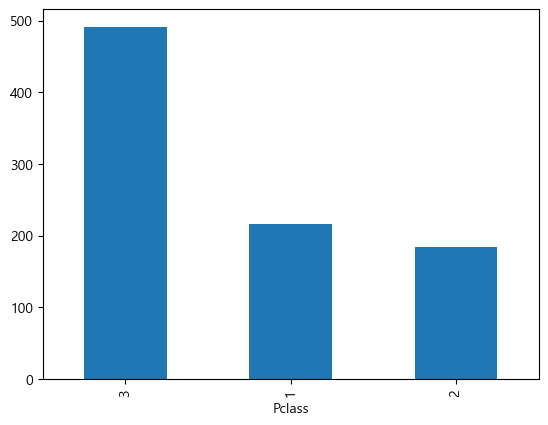

In [78]:
df["Pclass"].value_counts().plot(kind="bar", x="Pclass")
plt.show()

In [79]:
df["Pclass"].value_counts() # 클래스 별로 몇명이 있는지 확인

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [80]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])

In [81]:
sorted_pclass_3 = df[(df['Pclass'] == 3) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
print(sorted_pclass_3.to_string(max_rows=10))
average_fare_pclass_3 = sorted_pclass_3['Fare'].mean()
print(f"3등급 승객들의 평균 요금 = {average_fare_pclass_3}")

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare
PassengerId                                                       
379                 0       3    male  20.0      0      0   4.0125
327                 0       3    male  61.0      0      0   6.2375
844                 0       3    male  34.5      0      0   6.4375
819                 0       3    male  43.0      0      0   6.4500
372                 0       3    male  18.0      1      0   6.4958
...               ...     ...     ...   ...    ...    ...      ...
864                 0       3  female   NaN      8      2  69.5500
793                 0       3  female   NaN      8      2  69.5500
181                 0       3  female   NaN      8      2  69.5500
325                 0       3    male   NaN      8      2  69.5500
160                 0       3    male   NaN      8      2  69.5500
3등급 승객들의 평균 요금 = 13.787874948665301


In [82]:
sorted_pclass_2 = df[(df['Pclass'] == 2) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
print(sorted_pclass_2.to_string(max_rows=10))
average_fare_pclass_2 = sorted_pclass_2['Fare'].mean()
print(f"2등급 승객들의 평균 요금 = {average_fare_pclass_2}")

             Survived  Pclass     Sex   Age  SibSp  Parch  Fare
PassengerId                                                    
34                  0       2    male  66.0      0      0  10.5
85                  1       2  female  17.0      0      0  10.5
67                  1       2  female  29.0      0      0  10.5
57                  1       2  female  21.0      0      0  10.5
71                  0       2    male  32.0      0      0  10.5
...               ...     ...     ...   ...    ...    ...   ...
386                 0       2    male  18.0      0      0  73.5
121                 0       2    male  21.0      2      0  73.5
73                  0       2    male  21.0      0      0  73.5
666                 0       2    male  32.0      2      0  73.5
656                 0       2    male  24.0      2      0  73.5
2등급 승객들의 평균 요금 = 21.358661235955054


In [83]:
sorted_pclass_1 = df[(df['Pclass'] == 1) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
print(sorted_pclass_1.to_string(max_rows=10))
average_fare_pclass_1 = sorted_pclass_1['Fare'].mean()
print(f"1등급 승객들의 평균 요금 = {average_fare_pclass_1}")

             Survived  Pclass     Sex   Age  SibSp  Parch      Fare
PassengerId                                                        
873                 0       1    male  33.0      0      0    5.0000
663                 0       1    male  47.0      0      0   25.5875
169                 0       1    male   NaN      0      0   25.9250
797                 1       1  female  49.0      0      0   25.9292
863                 1       1  female  48.0      0      0   25.9292
...               ...     ...     ...   ...    ...    ...       ...
89                  1       1  female  23.0      3      2  263.0000
342                 1       1  female  24.0      3      2  263.0000
259                 1       1  female  35.0      0      0  512.3292
680                 1       1    male  36.0      0      1  512.3292
738                 1       1    male  35.0      0      0  512.3292
1등급 승객들의 평균 요금 = 86.14887440758294


## Pclass별 평균 요금

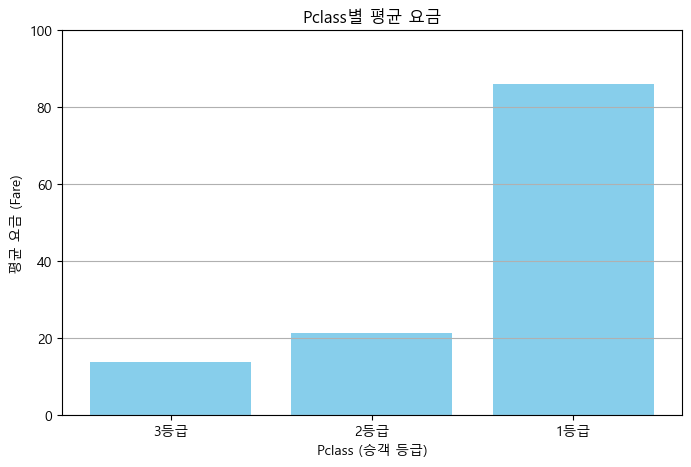

In [84]:
plt.rcParams['font.family'] = 'Malgun Gothic'

sorted_fares = [average_fare_pclass_3, average_fare_pclass_2, average_fare_pclass_1]
pclass_labels = ['3등급', '2등급', '1등급']

plt.figure(figsize=(8, 5))
plt.bar(pclass_labels, sorted_fares, color='skyblue')
plt.xlabel('Pclass (승객 등급)')
plt.ylabel('평균 요금 (Fare)')
plt.title('Pclass별 평균 요금')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

## Pclass별 생존수

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


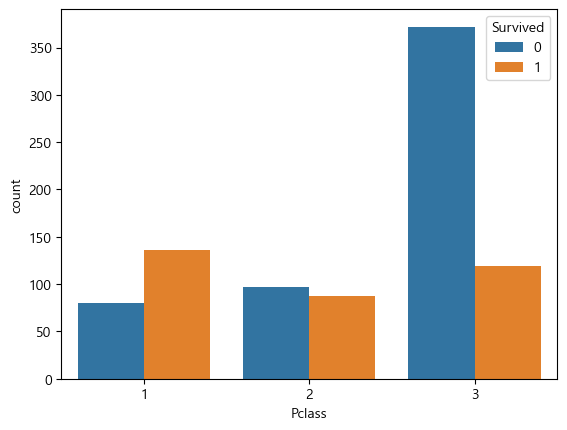

In [94]:
print(df['Pclass'].value_counts())
ax = sns.countplot(x = 'Pclass', hue = 'Survived',  data = df)

## 같이 탑승한 사람의 수(자신 제외)

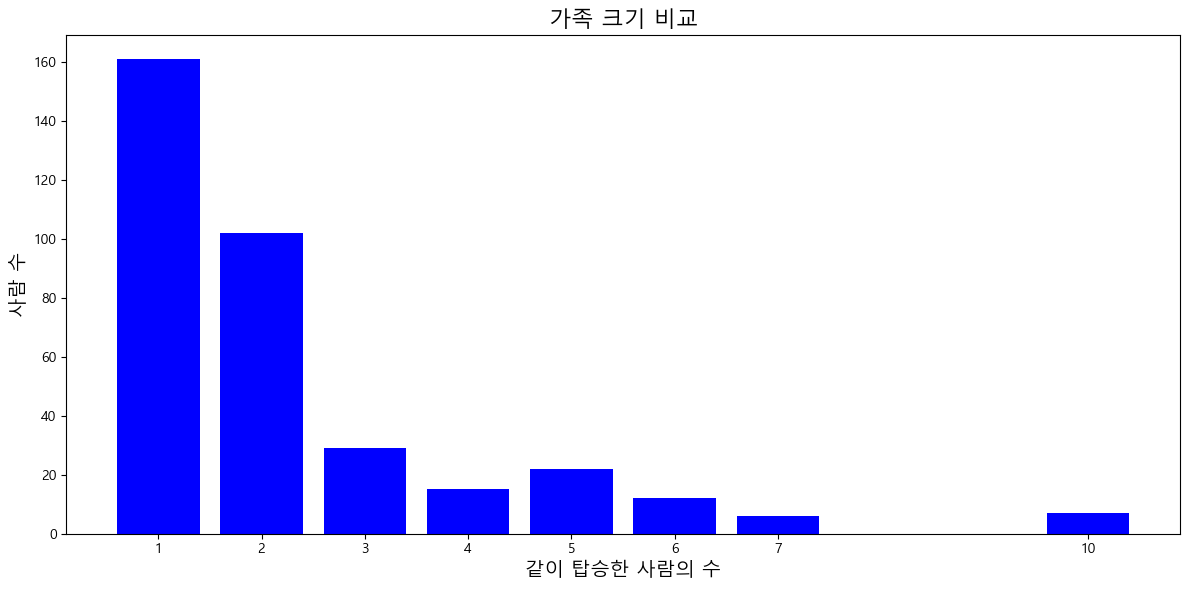

In [92]:
df['family_size'] = df['SibSp'] + df['Parch']

# 가족 크기 분포 시각화 (seaborn 없이)
plt.figure(figsize=(12, 6))
family_size_count = df['family_size'].value_counts().sort_index()
family_size_count = family_size_count[family_size_count.index != 0] #크기가 0인 혼자 탑승한 경우는 제외

plt.bar(family_size_count.index, family_size_count.values, color='blue')
plt.title('가족 크기 비교', fontsize=16)
plt.xlabel('같이 탑승한 사람의 수', fontsize=14)
plt.ylabel('사람 수', fontsize=14)
plt.xticks(family_size_count.index)
plt.tight_layout()
plt.show()

In [87]:
survival_prob = df.groupby('family_size')['Survived'].mean().reset_index()
print(survival_prob)

   family_size  Survived
0            0  0.303538
1            1  0.552795
2            2  0.578431
3            3  0.724138
4            4  0.200000
5            5  0.136364
6            6  0.333333
7            7  0.000000
8           10  0.000000


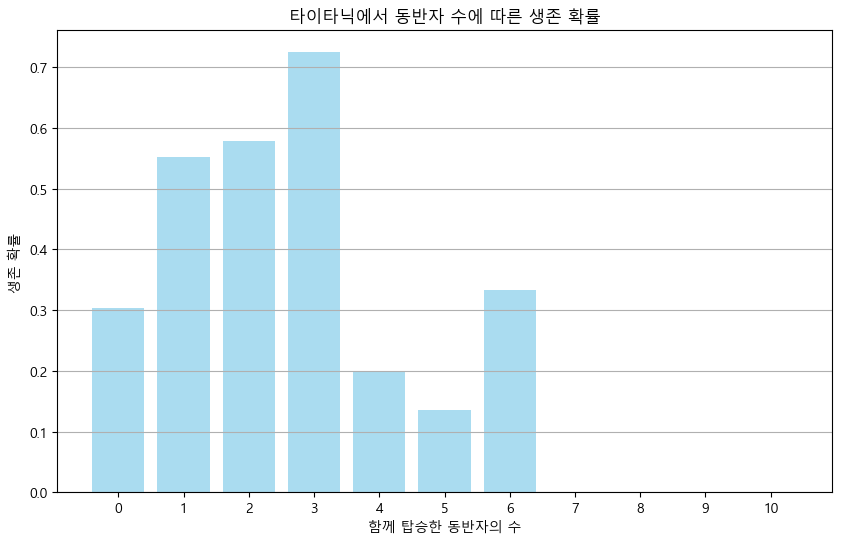

In [95]:
plt.figure(figsize=(10, 6))
plt.bar(survival_prob['family_size'], survival_prob['Survived'], color='skyblue', alpha=0.7)
plt.title('타이타닉에서 동반자 수에 따른 생존 확률')
plt.xlabel('함께 탑승한 동반자의 수')
plt.ylabel('생존 확률')
plt.xticks(range(int(survival_prob['family_size'].max()) + 1))
plt.grid(axis='y')
plt.show()

# 모델 만들기

In [89]:
# 가족이 있으면 1 없으면 0
df['WithFamily'] = df['family_size'].apply(lambda x: 1 if x > 0 else 0)

# 결측치 처리 (Age와 Fare의 결측치를 중앙값으로 대체)
df['Age'].fillna(df['Age'].median())
df['Fare'].fillna(df['Fare'].median())

# 성별을 숫자로 변환 (Male: 1, Female: 0)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# 독립 변수(X)와 종속 변수(y) 설정
X = df[['WithFamily', 'Sex', 'Age', 'Fare']]  # 가족 여부와 다른 특성들
y = df['Pclass']  # 객실 등급

# 학습용 데이터와 검증용 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 검증 데이터로 예측 수행
y_pred = model.predict(X_val)

# 정확도 평가
accuracy = accuracy_score(y_val, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

모델 정확도: 0.9218


In [91]:
# 테스트 데이터 전처리 (훈련 데이터와 동일한 방식으로 처리)
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test['WithFamily'] = df_test['FamilySize'].apply(lambda x: 1 if x > 0 else 0)
df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'].fillna(df_test['Fare'].median())
df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 0})

# 테스트 데이터로 예측 수행
X_test = df_test[['WithFamily', 'Sex', 'Age', 'Fare']]
test_predictions = model.predict(X_test)

# 결과 출력 (예시로 상위 몇 개만 출력)
print(test_predictions[:10])

[3 3 3 3 3 3 3 2 3 3]
